In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2024-05-16 14:42:14.067616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 14:42:14.067764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 14:42:14.169539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset_path = '/kaggle/input/blood-set/data'

In [3]:
def detect_labels(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (256, 256))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = detect_labels(dataset_path)

In [4]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0
print('total classes are: ', len(np.unique(labels)))

total classes are:  6


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.40))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.80))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,879,368 (64.39 MB)

 Trainable params: 16,879,368 (64.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
  2/171 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.1406 - loss: 3.3020 

I0000 00:00:1715868244.106942      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715868244.124609      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3199 - loss: 2.1391

W0000 00:00:1715868266.230742      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 150ms/step - accuracy: 0.3211 - loss: 2.1343 - val_accuracy: 0.7181 - val_loss: 0.7983
Epoch 2/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.7225 - loss: 0.7016 - val_accuracy: 0.8275 - val_loss: 0.4991
Epoch 3/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8020 - loss: 0.5181 - val_accuracy: 0.8539 - val_loss: 0.4502
Epoch 4/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8599 - loss: 0.3713 - val_accuracy: 0.8752 - val_loss: 0.3805
Epoch 5/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.8905 - loss: 0.3038 - val_accuracy: 0.9134 - val_loss: 0.2602
Epoch 6/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9036 - loss: 0.2776 - val_accuracy: 0.8678 - val_loss: 0.3596
Epoch 7/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9213 - loss: 0.2156 - val_accuracy: 0.9332 - val_loss: 0.2094
Epoch 8/15
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.9230 - loss: 0.2090 - val_accura

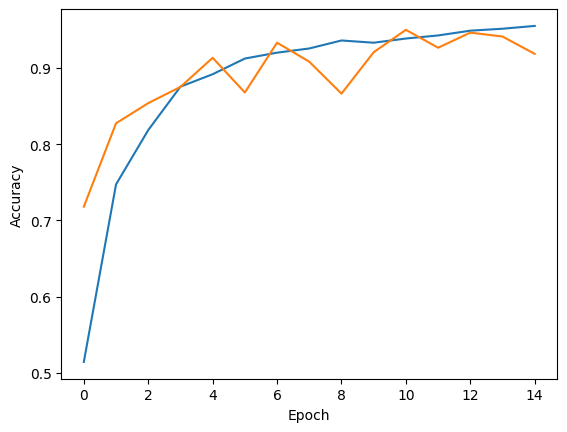

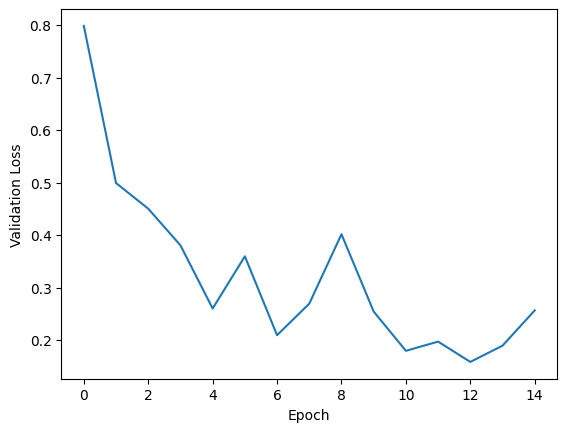

In [7]:
result = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [6]:
class_labels = ['Cancer', 'erythroblast', 'ig', 'lymphocyte', 'neutrophil','platelet']
def predict(path, model):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    expanded_img = np.expand_dims(img, axis=0)
    result = np.argmax(model.predict(expanded_img), axis=-1)[0]
    plt.imshow(img)
    plt.title(class_labels[result])
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


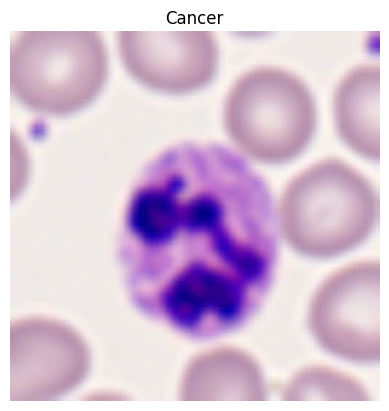

In [9]:
img = '/kaggle/input/test-set/Test/Cancer_1 (1).tiff'
predict(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


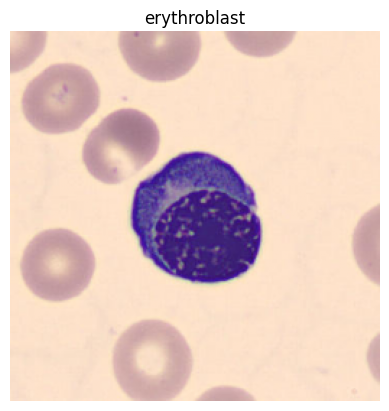

In [10]:
img = '/kaggle/input/test-set/Test/erythroblast.jpg'
predict(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


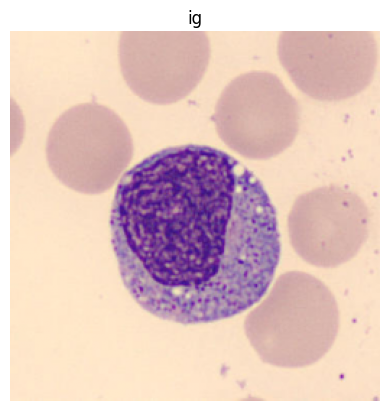

In [11]:
img = '/kaggle/input/test-set/Test/ig.jpg'
predict(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


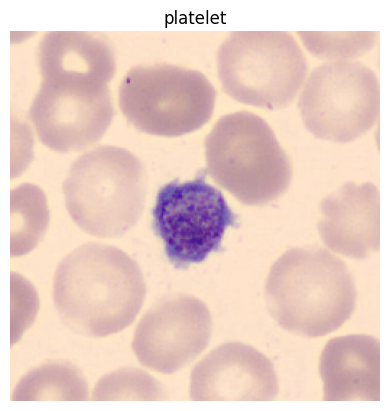

In [12]:
img = '/kaggle/input/test-set/Test/platelet.jpg'
predict(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


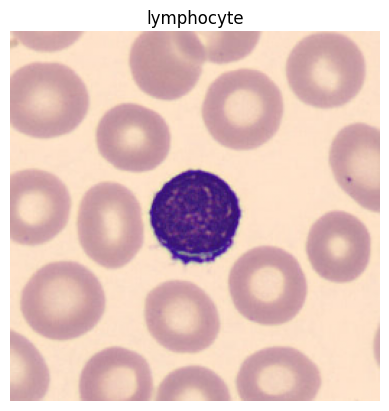

In [13]:
img = '/kaggle/input/test-set/Test/lymphocyte.jpg'
predict(img,model)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=6)
y_test_encoded = to_categorical(y_test, num_classes=6)

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

vgg_base.trainable = False

VGG = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

VGG.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/5
  1/171 ━━━━━━━━━━━━━━━━━━━━ 1:54:44 40s/step - accuracy: 0.2188 - loss: 1.9987

I0000 00:00:1715870710.857279      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715870710.877019      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7064 - loss: 1.6712

W0000 00:00:1715870745.503037      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1715870749.262286      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


171/171 ━━━━━━━━━━━━━━━━━━━━ 109s 400ms/step - accuracy: 0.7073 - loss: 1.6653 - val_accuracy: 0.9670 - val_loss: 0.1227
Epoch 2/5


W0000 00:00:1715870778.972300      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


171/171 ━━━━━━━━━━━━━━━━━━━━ 34s 197ms/step - accuracy: 0.9755 - loss: 0.0943 - val_accuracy: 0.9662 - val_loss: 0.1082
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.9928 - loss: 0.0386 - val_accuracy: 0.9802 - val_loss: 0.0751
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 202ms/step - accuracy: 0.9966 - loss: 0.0195 - val_accuracy: 0.9809 - val_loss: 0.0700
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 35s 204ms/step - accuracy: 0.9996 - loss: 0.0101 - val_accuracy: 0.9780 - val_loss: 0.0708


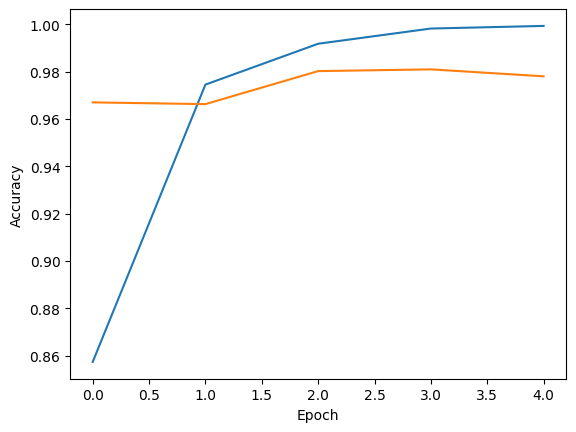

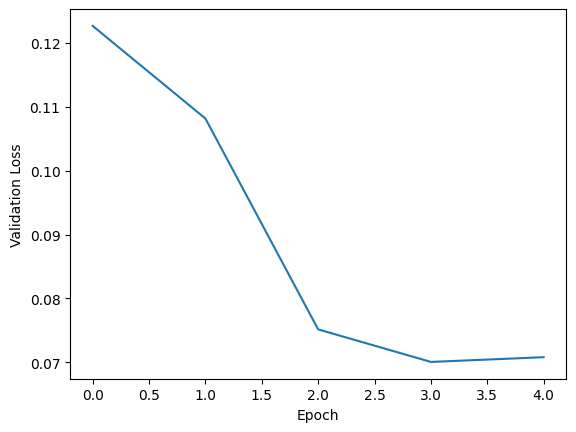

In [9]:
VggRes = VGG.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test, y_test_encoded))
plt.plot(VggRes.history['accuracy'], label='accuracy')
plt.plot(VggRes.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(VggRes.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


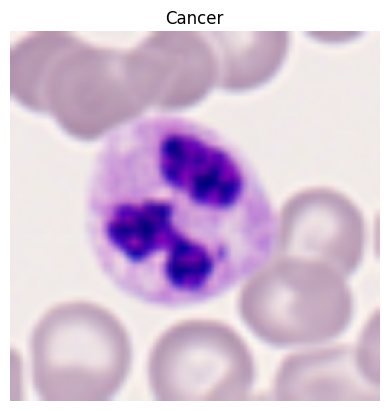

In [10]:
img = '/kaggle/input/test-set/Test/Cancer_3.tiff'
predict(img,VGG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


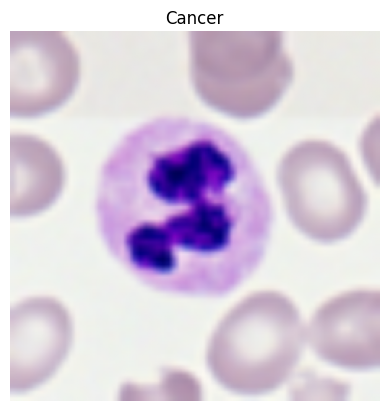

In [11]:
img = '/kaggle/input/test-set/Test/Cancer_2.tiff'
predict(img,VGG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


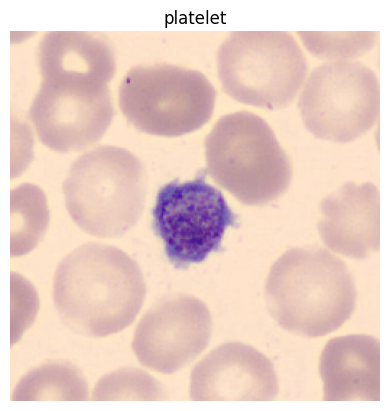

In [12]:
img = '/kaggle/input/test-set/Test/platelet.jpg'
predict(img,VGG)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


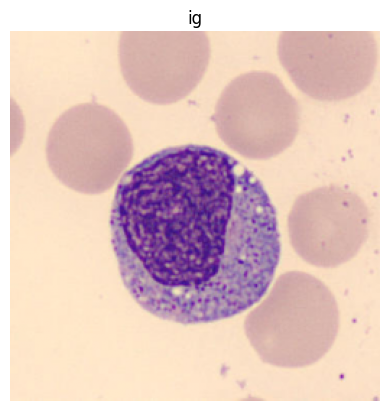

In [13]:
img = '/kaggle/input/test-set/Test/ig.jpg'
predict(img,VGG)

In [14]:
from tensorflow.keras.applications import ResNet50

res_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

res_base.trainable = False

ResNet = Sequential([
    res_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

ResNet.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.8775 - loss: 0.3709 - val_accuracy: 0.8532 - val_loss: 0.4081
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8371 - loss: 0.4745 - val_accuracy: 0.6153 - val_loss: 0.9210
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8346 - loss: 0.4618 - val_accuracy: 0.9001 - val_loss: 0.3068
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.8765 - loss: 0.3698 - val_accuracy: 0.9148 - val_loss: 0.2502
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.9085 - loss: 0.2713 - val_accuracy: 0.8825 - val_loss: 0.3450
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.8974 - loss: 0.3053 - val_accuracy: 0.9112 - val_loss: 0.2829
Epoch 7/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 23s 132ms/step - accuracy: 0.8998 - loss: 0.2907 - val_accuracy: 0.8480 - val_loss: 0.4913
Epoch 8/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.8965 - loss: 0

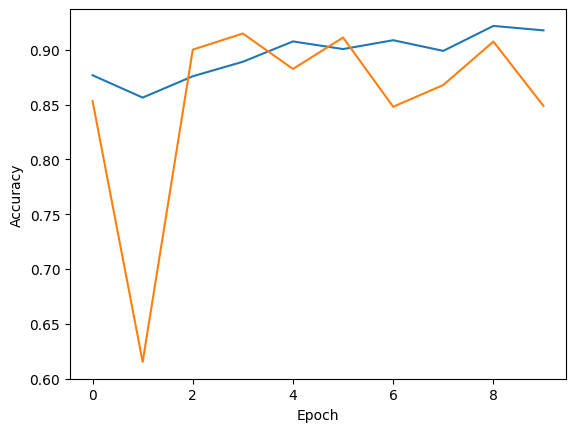

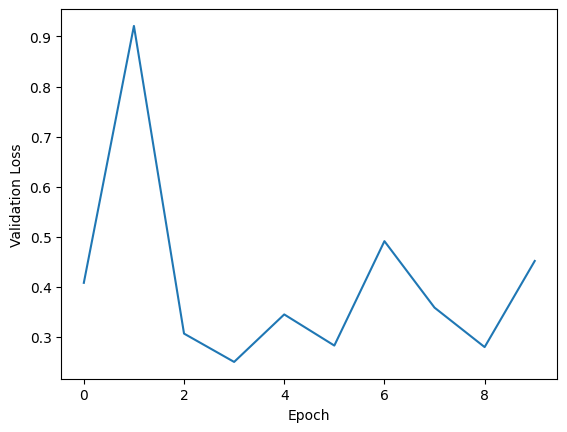

In [21]:
resRes = ResNet.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))
plt.plot(resRes.history['accuracy'], label='accuracy')
plt.plot(resRes.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(resRes.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


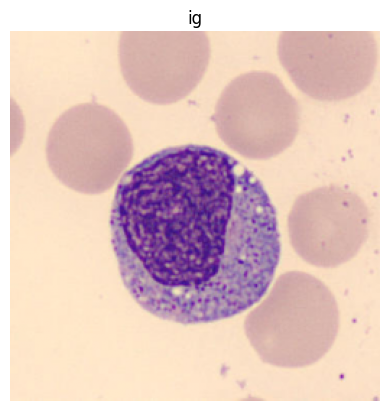

In [22]:
img = '/kaggle/input/test-set/Test/ig.jpg'
predict(img,ResNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


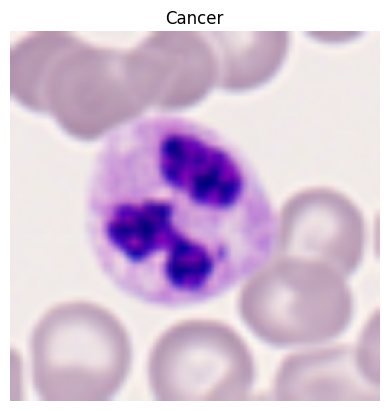

In [23]:
img = '/kaggle/input/test-set/Test/Cancer_3.tiff'
predict(img,ResNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


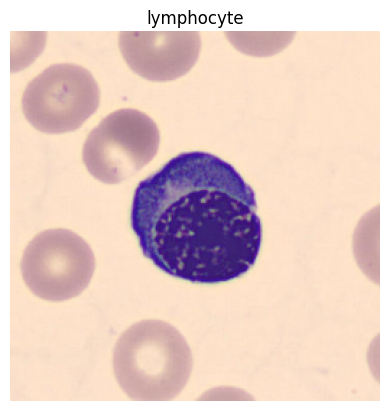

In [24]:
img = '/kaggle/input/test-set/Test/erythroblast.jpg'
predict(img,ResNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


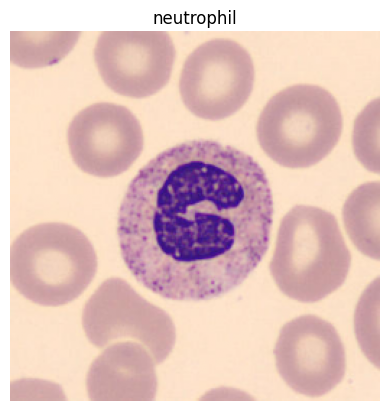

In [25]:
img = '/kaggle/input/test-set/Test/neutrophil.jpg'
predict(img,ResNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


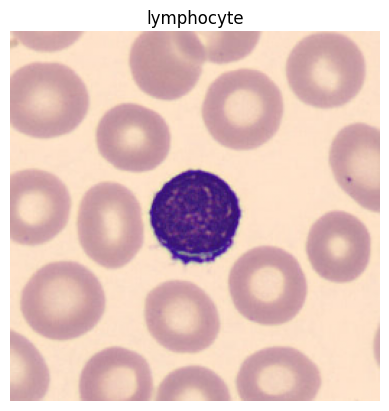

In [26]:
img = '/kaggle/input/test-set/Test/lymphocyte.jpg'
predict(img,ResNet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


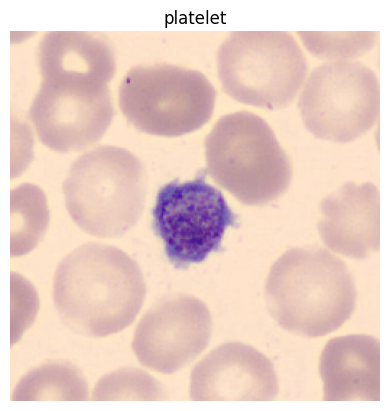

In [27]:
img = '/kaggle/input/test-set/Test/platelet.jpg'
predict(img,ResNet)